# Online Payments Fraud Detection

This notebook includes **Logistic Regression, Decision Tree, Random Forest, Gradient Boosting** classification models and accuracy scores.



In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding Data & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
data = pd.read_csv('spit.csv', sep = ',')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Feature Explanation:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no null columns in dataset.

In [7]:
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


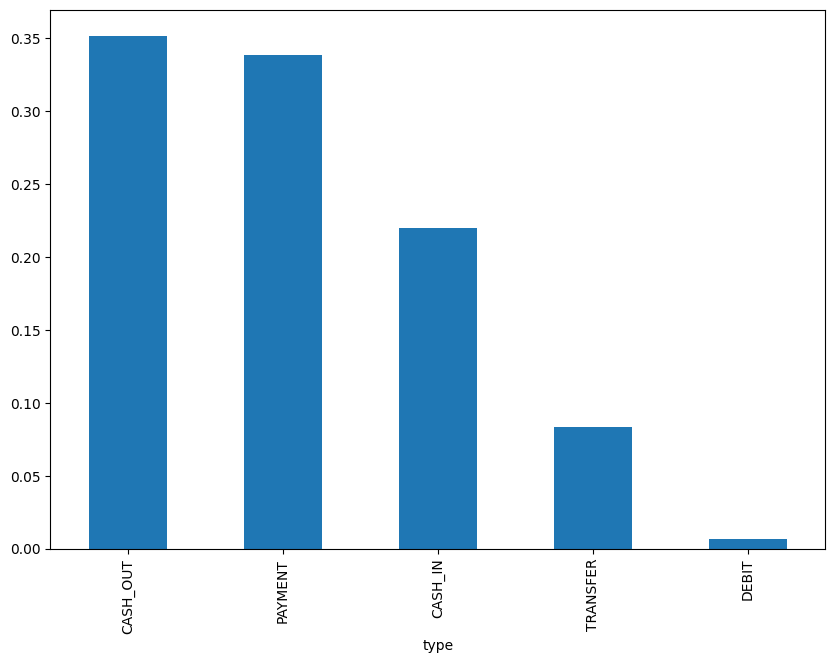

In [8]:
fig = plt.figure(figsize =(10, 7))
data['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [9]:
print("No Frauds Percentage:",data['isFraud'].value_counts()[0]/len(data['isFraud'])*100)
print("Frauds Percentage:",data['isFraud'].value_counts()[1]/len(data['isFraud'])*100)

No Frauds Percentage: 99.87091795518198
Frauds Percentage: 0.12908204481801522


Imbalance dataset.

In [10]:
data.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1, inplace = True)


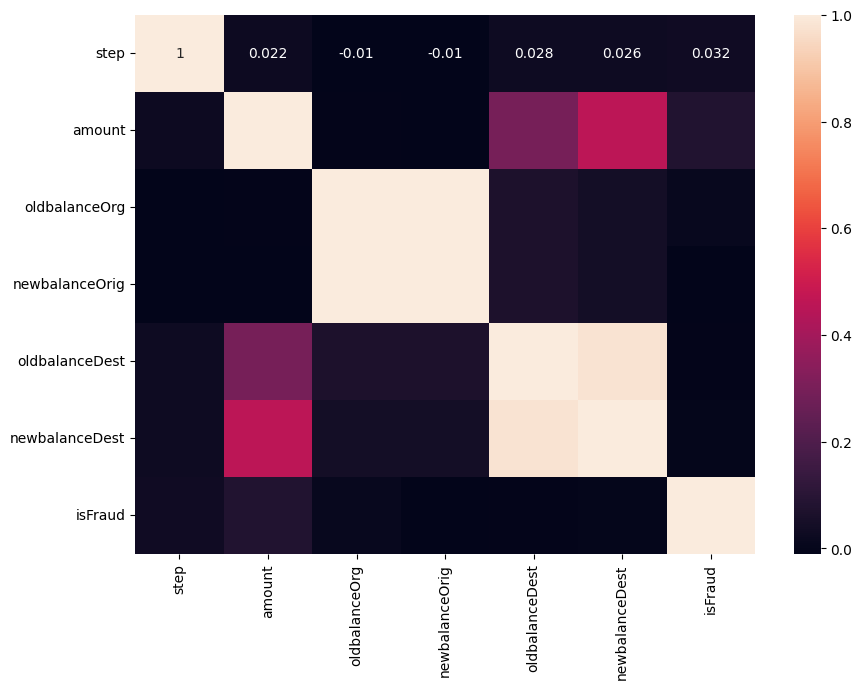

In [11]:
correlationdata = data.copy()
correlationdata.drop(['type'], axis = 1, inplace = True)

fig = plt.figure(figsize =(10, 7))
sns.heatmap(correlationdata.corr(), annot = True)
plt.show()

There is no correlation between columns.

In [12]:
dataf = pd.get_dummies(data = data,columns = ['type'], drop_first = True)
dataf.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False


In [13]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
scaled_data = rscaler.fit_transform(dataf)
data_sc = pd.DataFrame(scaled_data, columns = dataf.columns)

data_sc.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1.0,0.0,0.0,0.0,1.0
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1.0,1.0,0.0,0.0,0.0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0


# Model Training

In [14]:
nonfraud = dataf[dataf['isFraud']==0]
fraud = dataf[dataf['isFraud']==1]
nonfraud = nonfraud.sample(n=8300, random_state = 1)

frauddata = pd.merge(fraud,nonfraud, how = "outer")

In [15]:
x = frauddata.drop('isFraud', axis = 1)
y = frauddata['isFraud']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3, random_state = 42)

#### Logistic Regression

In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

#### Decision Tree Classifier

In [18]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)


#### Random Forest Classifier

In [19]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)


#### Gradient Boosting


In [20]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred_gb = gb.predict(x_test)


#### Classification Reports and Evaluations

In [21]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression classification report: \n\n"  ,classification_report(y_test,y_pred))

Logistic Regression classification report: 

               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5779
           1       0.90      0.90      0.90      5781

    accuracy                           0.90     11560
   macro avg       0.90      0.90      0.90     11560
weighted avg       0.90      0.90      0.90     11560



In [22]:
print("Decision Tree classification report: \n\n"  ,classification_report(y_test,y_pred_dt))

Decision Tree classification report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5779
           1       0.98      0.99      0.99      5781

    accuracy                           0.99     11560
   macro avg       0.99      0.99      0.99     11560
weighted avg       0.99      0.99      0.99     11560



In [23]:
print("Random Forest classification report: \n\n"  ,classification_report(y_test,y_pred_rf))

Random Forest classification report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5779
           1       0.99      1.00      0.99      5781

    accuracy                           0.99     11560
   macro avg       0.99      0.99      0.99     11560
weighted avg       0.99      0.99      0.99     11560



In [24]:
print("Gradient Boosting classification report: \n\n"  ,classification_report(y_test,y_pred_gb))

Gradient Boosting classification report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5779
           1       0.98      0.99      0.99      5781

    accuracy                           0.99     11560
   macro avg       0.99      0.99      0.99     11560
weighted avg       0.99      0.99      0.99     11560



In [25]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test,y_pred))
print("Decision Tree Accuracy Score: ", accuracy_score(y_test,y_pred_dt))
print("Random Forest accuracy score: ", accuracy_score(y_test,y_pred_rf))
print("Gradient Boosting accuracy score: ", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy Score: 0.8992214532871973
Decision Tree Accuracy Score:  0.985553633217993
Random Forest accuracy score:  0.9908304498269896
Gradient Boosting accuracy score:  0.9873702422145328


# Conclusion

For the fraud prediction, Random Forest Classification model has the highest accuracy score.

In [29]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
